In [1]:
%run library_TS.py
%run library_discrete.py

Python version: 3.9.16 (main, Mar  8 2023, 10:39:24) [MSC v.1916 64 bit (AMD64)]
NumPy version: 1.23.5
pandas version: 1.5.3
matplotlib: 3.7.1
TSfresh: 0.20.0
Sklearn version: 1.1.3


c:\Users\Windows\miniconda3\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


Xgboost version: 1.5.0
Lightgbm version: 2.2.3
Python version: 3.9.16 (main, Mar  8 2023, 10:39:24) [MSC v.1916 64 bit (AMD64)]
NumPy version: 1.23.5
pandas version: 1.5.3
matplotlib: 3.7.1
seaborn: 3.7.1
Sklearn version: 1.1.3
LightGBM: 2.2.3
XGBoost: 1.5.0
TensorFlow: 2.12.0
SHAP: 0.41.0
missingno: 0.5.2
imblearn: 0.10.1


Tensorflow Addons supports using Python ops for all Tensorflow versions above or equal to 2.9.0 and strictly below 2.12.0 (nightly versions are not supported). 
 The versions of TensorFlow you are currently using is 2.12.0 and is not supported. 
Some things might work, some things might not.
If you were to encounter a bug, do not file an issue.
If you want to make sure you're using a tested and supported configuration, either change the TensorFlow version or the TensorFlow Addons's version. 
You can find the compatibility matrix in TensorFlow Addon's readme:
https://github.com/tensorflow/addons


joblib: 1.1.1
tableone: 0.7.12


In [2]:
# Discrete variables 
data_discretes = pd.read_excel("//wsl.localhost/Ubuntu/home/romain/GITHUB/Extub-IA/BDD/For_descriptif.xlsx")
# TS variables
data_TS = pd.read_csv("//wsl.localhost/Ubuntu/home/romain/GITHUB/Extub-IA/TimeSeries/Features_extraction/Features_extraction_24H/Filtered features extracted (150 features).csv")
target_df = pd.read_excel("//wsl.localhost/Ubuntu/home/romain/GITHUB/Extub-IA/BDD/Target.xls", dtype=str, index_col=None, usecols=["ID", "Weaning_success"])
y=target_df["Weaning_success"]
X_full = pd.concat([data_discretes, data_TS,y], axis="columns") 


list_features = ['Fibrinogen','RR__root_mean_square','Weight gain', 'Weaning_success', 'VAP']
data = X_full[list_features]

data=data[data.Fibrinogen<10]

X_success = data[data["Weaning_success"]=='1']
X_success= X_success[list_features]
X_failure = data[data["Weaning_success"]=='0']
X_failure = X_failure[list_features]

In [3]:
############# Imputation by KNN method
scaler = MinMaxScaler() # First Standardization
data = pd.DataFrame(scaler.fit_transform(data), columns = data.columns)

# The KNN method for the imputation, in this case we use 2 neighbors
imputer = KNNImputer(n_neighbors=2)
data = pd.DataFrame(imputer.fit_transform(data),columns = data.columns)


In [4]:

data2=data[data.Fibrinogen<0.4]

In [5]:
pandasgui.show(data2)

PandasGUI INFO — pandasgui.gui — Opening PandasGUI


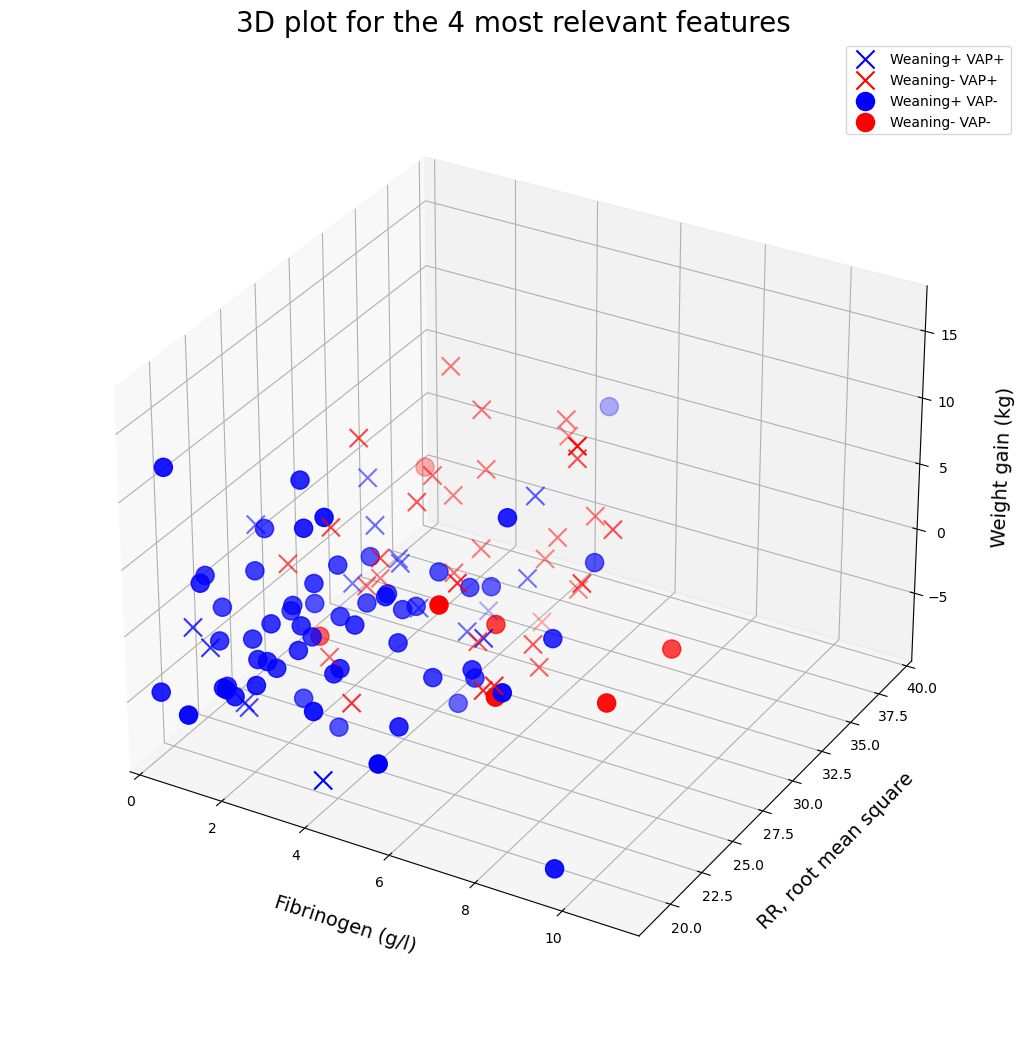

In [6]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = [13,22]

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

X_vap_s = X_success[X_success["VAP"]==1]
X_vap_f = X_failure[X_failure["VAP"]==1]
X_novap_s = X_success[X_success["VAP"]==0]
X_novap_f = X_failure[X_failure["VAP"]==0]

colors=['b','r']

x1 =X_vap_s['Fibrinogen']
y1 =X_vap_s['RR__root_mean_square']
z1 =X_vap_s['Weight gain']

x2 =X_vap_f['Fibrinogen']
y2 =X_vap_f['RR__root_mean_square']
z2 =X_vap_f['Weight gain']

x3 =X_novap_s['Fibrinogen']
y3 =X_novap_s['RR__root_mean_square']
z3 =X_novap_s['Weight gain']

x4 =X_novap_f['Fibrinogen']
y4 =X_novap_f['RR__root_mean_square']
z4 =X_novap_f['Weight gain']


ax.scatter(x1, y1, z1, marker='x', color=colors[0], s= 170,depthshade=True, label='Weaning+ VAP+')
ax.scatter(x2, y2, z2, marker='x', color=colors[1], s= 170,depthshade=True, label='Weaning- VAP+')
ax.scatter(x3, y3, z3, marker='o', color=colors[0], s= 170,depthshade=True, label='Weaning+ VAP-')
ax.scatter(x4, y4, z4, marker='o', color=colors[1], s= 170,depthshade=True, label='Weaning- VAP-')


ax.set_xlabel('Fibrinogen (g/l)',fontsize = 14,labelpad=20)
ax.set_ylabel('RR, root mean square',fontsize = 14,labelpad=20)
ax.set_zlabel('Weight gain (kg)',fontsize = 14,labelpad=20)

plt.legend(loc='best')
plt.xlim(0, 11.5)
plt.ylim(18,40)
ax.set_box_aspect(aspect=None, zoom=0.90)
plt.margins(0.01)
plt.title("3D plot for the 4 most relevant features", fontsize = 20)
plt.savefig('3D(relevant).png', dpi = 900)
plt.show()


In [7]:
# Discrete variables 
data_discretes = pd.read_excel("//wsl.localhost/Ubuntu/home/romain/GITHUB/Extub-IA/BDD/For_descriptif.xlsx")
# TS variables
data_TS = pd.read_csv("C:/Users/Windows/Documents/Essai/Filtered features extracted (150 features).csv")
target_df = pd.read_excel("//wsl.localhost/Ubuntu/home/romain/GITHUB/Extub-IA/BDD/Target.xls", dtype=str, index_col=None, usecols=["ID", "Weaning_success"])
y=target_df["Weaning_success"]
X_full = pd.concat([data_discretes, data_TS,y], axis="columns") 

list_features = ['Tidal_Volume__fft_coefficient__attr_abs__coeff_5','Weight gain', 'Weaning_success', 'VAP','CPIS__fft_coefficient__attr_angle__coeff_15']

X_success = X_full[X_full["Weaning_success"]=='1']
X_success= X_success[list_features]
X_failure = X_full[X_full["Weaning_success"]=='0']
X_failure = X_failure[list_features]


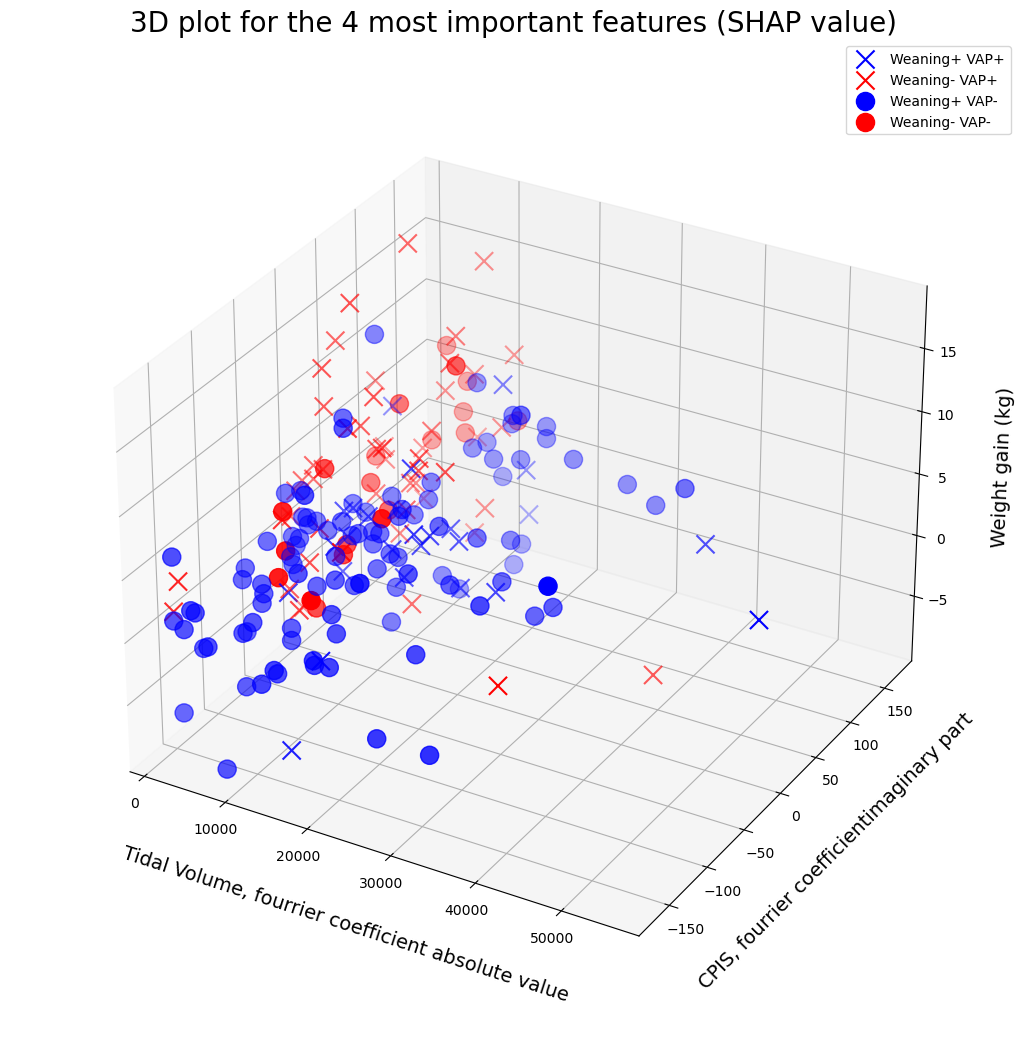

In [8]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = [13,22]

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

X_vap_s = X_success[X_success["VAP"]==1]
X_vap_f = X_failure[X_failure["VAP"]==1]
X_novap_s = X_success[X_success["VAP"]==0]
X_novap_f = X_failure[X_failure["VAP"]==0]

colors=['b','r']

x1 =X_vap_s['Tidal_Volume__fft_coefficient__attr_abs__coeff_5']
y1 =X_vap_s['CPIS__fft_coefficient__attr_angle__coeff_15']
z1 =X_vap_s['Weight gain']

x2 =X_vap_f['Tidal_Volume__fft_coefficient__attr_abs__coeff_5']
y2 =X_vap_f['CPIS__fft_coefficient__attr_angle__coeff_15']
z2 =X_vap_f['Weight gain']

x3 =X_novap_s['Tidal_Volume__fft_coefficient__attr_abs__coeff_5']
y3 =X_novap_s['CPIS__fft_coefficient__attr_angle__coeff_15']
z3 =X_novap_s['Weight gain']

x4 =X_novap_f['Tidal_Volume__fft_coefficient__attr_abs__coeff_5']
y4 =X_novap_f['CPIS__fft_coefficient__attr_angle__coeff_15']
z4 =X_novap_f['Weight gain']


ax.scatter(x1, y1, z1, marker='x', color=colors[0], s= 170,depthshade=True, label='Weaning+ VAP+')
ax.scatter(x2, y2, z2, marker='x', color=colors[1], s= 170,depthshade=True, label='Weaning- VAP+')
ax.scatter(x3, y3, z3, marker='o', color=colors[0], s= 170,depthshade=True, label='Weaning+ VAP-')
ax.scatter(x4, y4, z4, marker='o', color=colors[1], s= 170,depthshade=True, label='Weaning- VAP-')


ax.set_xlabel('Tidal Volume, fourrier coefficient absolute value',fontsize = 14,labelpad=20)
ax.set_ylabel('CPIS, fourrier coefficientimaginary part',fontsize = 14,labelpad=20)
ax.set_zlabel('Weight gain (kg)',fontsize = 14,labelpad=20)

plt.legend(loc='best')
#plt.xlim(0, 11.5)
#plt.ylim(18,40)
ax.set_box_aspect(aspect=None, zoom=0.90)
plt.margins(0.01)
plt.title("3D plot for the 4 most important features (SHAP value)", fontsize = 20)
plt.savefig('3D(important).png', dpi = 900)
plt.show()


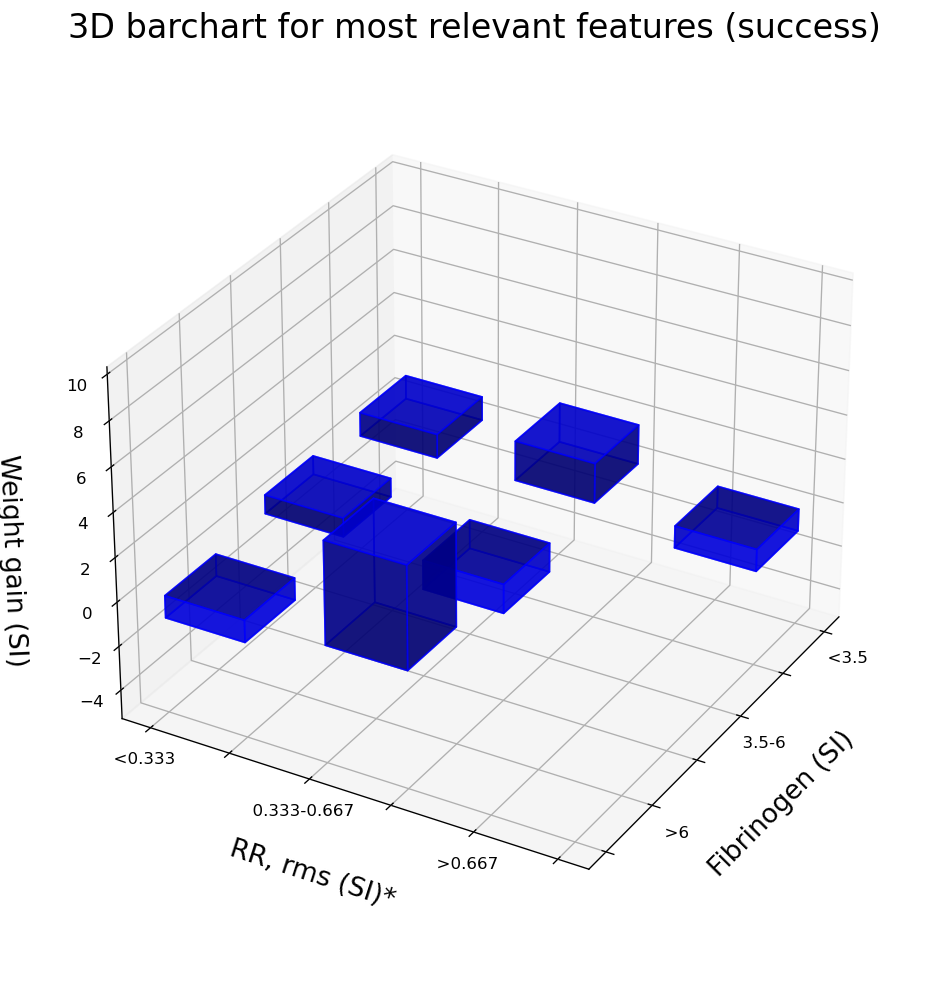

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
plt.rcParams["figure.figsize"] = [10,10]
plt.rcParams["figure.dpi"] = 120

df = pd.DataFrame({'Fibrinogen': X_success['Fibrinogen'],
                   'RR__root_mean_square': X_success['RR__root_mean_square'],
                   'Weight_gain': X_success['Weight gain']})


df['RR__root_mean_square']=(df['RR__root_mean_square']-df['RR__root_mean_square'].min())/(df['RR__root_mean_square'].max()-df['RR__root_mean_square'].min())
df = df.fillna(df.median())

x1 = pd.cut(df['Fibrinogen'], [0,3.5,6,10])
y1 = pd.cut(df['RR__root_mean_square'], 3)
z1 = df['Weight_gain']

out = (pd.DataFrame({'Fibrinogen': x1.cat.codes,
                     'RR__root_mean_square': y1.cat.codes,
                     'Weight_gain': z1})
         .groupby(['Fibrinogen', 'RR__root_mean_square'], as_index=False)['Weight_gain'].mean())

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
lgth = len(out)
ax.bar3d(out['Fibrinogen'], out['RR__root_mean_square'], np.zeros(lgth), 
        np.ones(lgth)-0.5, np.ones(lgth)-0.5, out['Weight_gain'],alpha=0.7,color='blue', edgecolor='blue')

a=ax.get_xticks().tolist()
a[1]='  <3.5'
a[2]=''
a[3]='  3.5-6'
a[4]=''
a[5]='  >6'
a[6]=''
#a[7]='  >7'
#a[8]=''
ax.set_xticklabels(a)
plt.xticks(fontsize=10)
ax.set_xlabel('Fibrinogen (SI)', labelpad=18, rotation=120, fontsize=16)

b=ax.get_yticks().tolist()
b[1]='  <0.333'
b[2]=''
b[3]='  0.333-0.667'
b[4]=''
b[5]='  >0.667'
b[6]=''
ax.set_yticklabels(b)
plt.yticks(fontsize=10)
ax.set_ylabel('RR, rms (SI)*', labelpad=18, rotation=120,fontsize=16)

#ax.set_zlim(0,1)
ax.set_zlabel('Weight gain (SI)', labelpad=18, rotation=120,fontsize=16)
ax.set_zlim3d([-5,10])

ax.view_init(ax.elev, ax.azim+90)
ax.set_box_aspect(aspect=None, zoom=0.9)

plt.title("3D barchart for most relevant features (success)", fontsize = 20)

plt.savefig('3D barchart for most relevant feature (success).png', dpi = 900)
plt.show()


In [25]:
dict( zip( x1.cat.codes, x1 ) )



{1: Interval(3.5, 6.0, closed='right'),
 0: Interval(0.0, 3.5, closed='right'),
 2: Interval(6.0, 10.0, closed='right')}

In [32]:
dict( zip( y1.cat.codes, y1 ) )

{1: Interval(0.333, 0.667, closed='right'),
 0: Interval(-0.001, 0.333, closed='right'),
 2: Interval(0.667, 1.0, closed='right')}

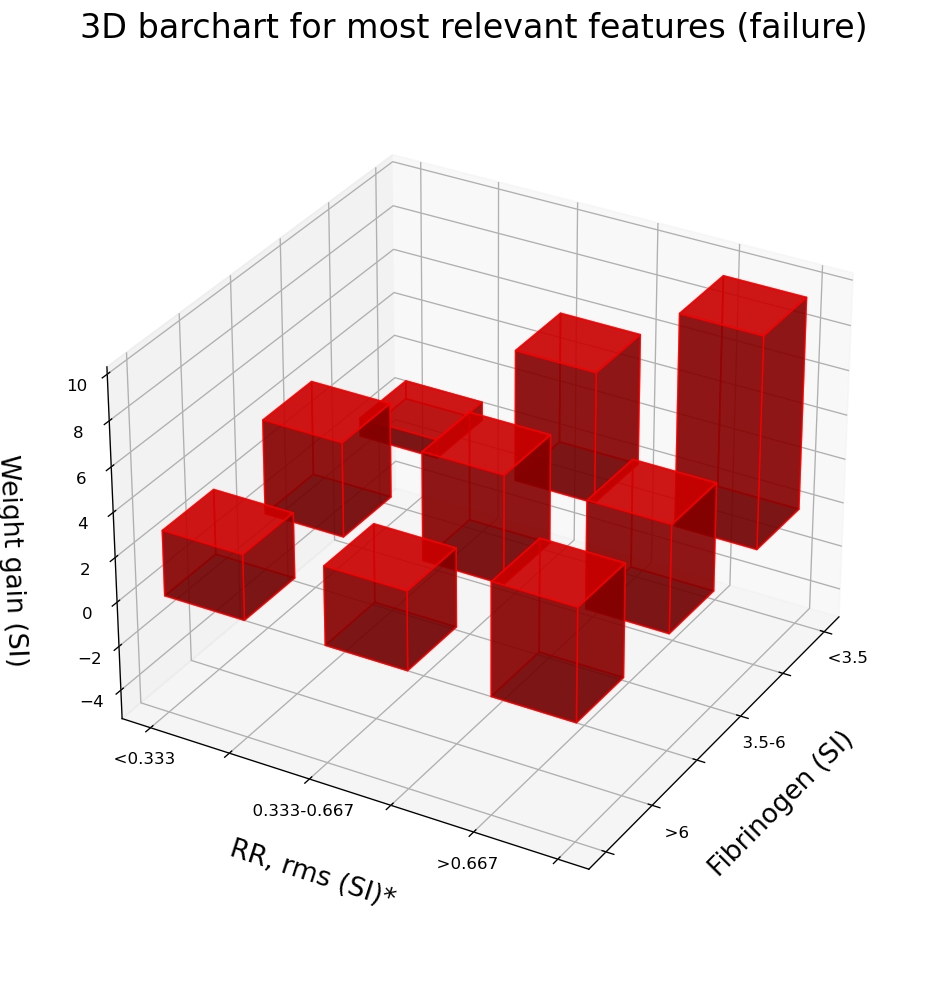

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
plt.rcParams["figure.figsize"] = [10,10]
plt.rcParams["figure.dpi"] = 120

df = pd.DataFrame({'Fibrinogen': X_failure['Fibrinogen'],
                   'RR__root_mean_square': X_failure['RR__root_mean_square'],
                   'Weight_gain': X_failure['Weight gain']})


df['RR__root_mean_square']=(df['RR__root_mean_square']-df['RR__root_mean_square'].min())/(df['RR__root_mean_square'].max()-df['RR__root_mean_square'].min())
df = df.fillna(df.median())

x1 = pd.cut(df['Fibrinogen'], [0,3.5,6,10])
y1 = pd.cut(df['RR__root_mean_square'], 3)
z1 = df['Weight_gain']

out = (pd.DataFrame({'Fibrinogen': x1.cat.codes,
                     'RR__root_mean_square': y1.cat.codes,
                     'Weight_gain': z1})
         .groupby(['Fibrinogen', 'RR__root_mean_square'], as_index=False)['Weight_gain'].mean())

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
lgth = len(out)
ax.bar3d(out['Fibrinogen'], out['RR__root_mean_square'], np.zeros(lgth), 
        np.ones(lgth)-0.5, np.ones(lgth)-0.5, out['Weight_gain'],alpha=0.7,color='red', edgecolor='red')

a=ax.get_xticks().tolist()
a[1]='  <3.5'
a[2]=''
a[3]='  3.5-6'
a[4]=''
a[5]='  >6'
a[6]=''
#a[7]='  >7'
#a[8]=''
ax.set_xticklabels(a)
plt.xticks(fontsize=10)
ax.set_xlabel('Fibrinogen (SI)', labelpad=18, rotation=120, fontsize=16)

b=ax.get_yticks().tolist()
b[1]='  <0.333'
b[2]=''
b[3]='  0.333-0.667'
b[4]=''
b[5]='  >0.667'
b[6]=''
ax.set_yticklabels(b)
plt.yticks(fontsize=10)
ax.set_ylabel('RR, rms (SI)*', labelpad=18, rotation=120,fontsize=16)

#ax.set_zlim(0,1)
ax.set_zlabel('Weight gain (SI)', labelpad=18, rotation=120,fontsize=16)
ax.set_zlim3d([-5,10])

ax.view_init(ax.elev, ax.azim+90)
ax.set_box_aspect(aspect=None, zoom=0.9)

plt.title("3D barchart for most relevant features (failure)", fontsize = 20)

plt.savefig('3D barchart for most relevant feature (failure).png', dpi = 900)
plt.show()


In [31]:
dict( zip(x1.cat.codes, x1))

{0: Interval(1.719, 3.78, closed='right'),
 1: Interval(3.78, 5.445, closed='right'),
 2: Interval(5.445, 7.022, closed='right'),
 3: Interval(7.022, 9.73, closed='right')}

In [14]:
dict( zip(y1.cat.codes, y1))

{2: Interval(2.0, 6.0, closed='right'),
 0: Interval(-6.0, 0.0, closed='right'),
 1: Interval(0.0, 2.0, closed='right'),
 3: Interval(6.0, 18.0, closed='right'),
 -1: nan}

In [6]:
import pandas as pd
import numpy as np

# Discrete variables 
data_discretes = pd.read_excel("//wsl.localhost/Ubuntu/home/romain/GITHUB/Extub-IA/BDD/For_descriptif.xlsx")
# TS variables
data_TS = pd.read_csv("C:/Users/Windows/Documents/Essai/Filtered features extracted (150 features).csv")
target_df = pd.read_excel("//wsl.localhost/Ubuntu/home/romain/GITHUB/Extub-IA/BDD/Target.xls", dtype=str, index_col=None, usecols=["ID", "Weaning_success"])
y=target_df["Weaning_success"]
X_full = pd.concat([data_discretes, data_TS,y], axis="columns") 

list_features = ['Tidal_Volume__fft_coefficient__attr_abs__coeff_5','Weight gain', 'Weaning_success', 'VAP','CPIS__fft_coefficient__attr_angle__coeff_15',
                 'RR__fft_coefficient__attr_abs__coeff_86']

X_success = X_full[X_full["Weaning_success"]=='1']
X_success= X_success[list_features]
X_failure = X_full[X_full["Weaning_success"]=='0']
X_failure = X_failure[list_features]


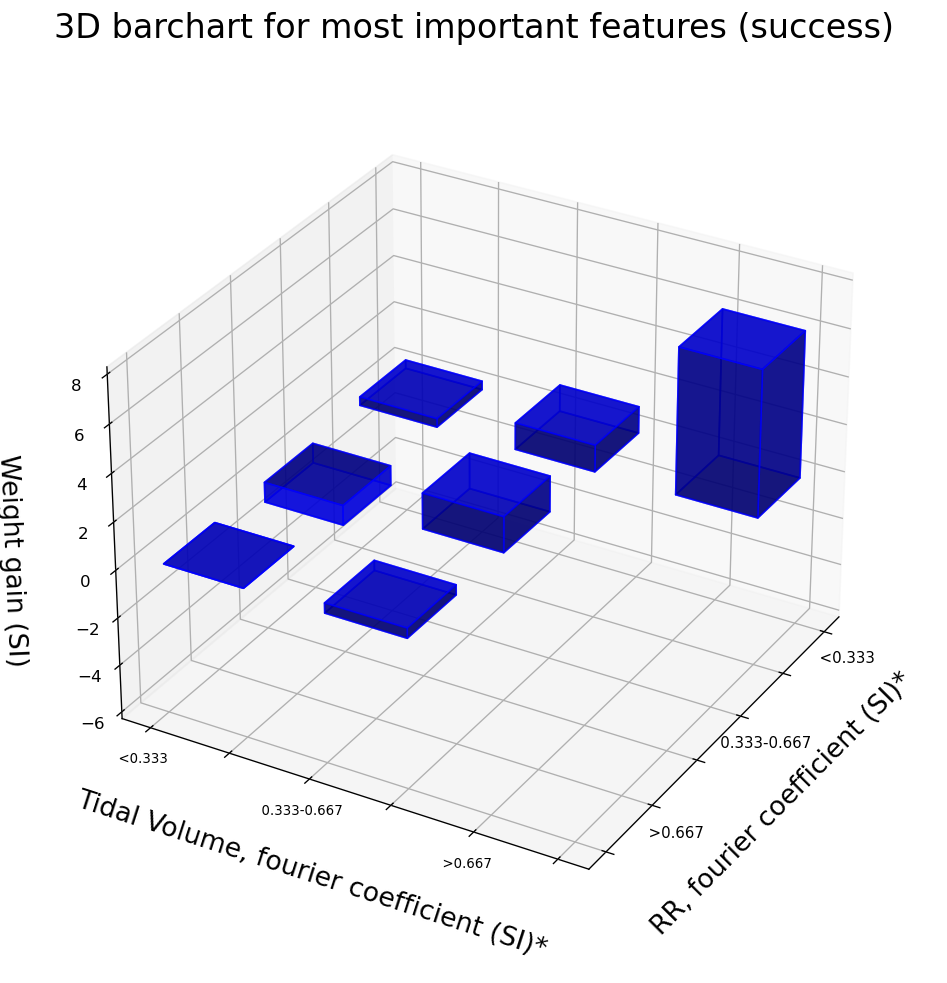

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
plt.rcParams["figure.figsize"] = [10,10]
plt.rcParams["figure.dpi"] = 120

df = pd.DataFrame({'Tidal_Volume__fft_coefficient__attr_abs__coeff_5': X_success['Tidal_Volume__fft_coefficient__attr_abs__coeff_5'],
                   'RR__fft_coefficient__attr_abs__coeff_86': X_success['RR__fft_coefficient__attr_abs__coeff_86'],
                   'Weight_gain': X_success['Weight gain']})


df['Tidal_Volume__fft_coefficient__attr_abs__coeff_5']=(df['Tidal_Volume__fft_coefficient__attr_abs__coeff_5']-df['Tidal_Volume__fft_coefficient__attr_abs__coeff_5'].min())/(df['Tidal_Volume__fft_coefficient__attr_abs__coeff_5'].max()-df['Tidal_Volume__fft_coefficient__attr_abs__coeff_5'].min())
df['RR__fft_coefficient__attr_abs__coeff_86']=(df['RR__fft_coefficient__attr_abs__coeff_86']-df['RR__fft_coefficient__attr_abs__coeff_86'].min())/(df['RR__fft_coefficient__attr_abs__coeff_86'].max()-df['RR__fft_coefficient__attr_abs__coeff_86'].min())
#df['Weight_gain']=(df['Weight_gain']-df['Weight_gain'].min())/(df['Weight_gain'].max()-df['Weight_gain'].min())
df = df.fillna(df.mean())

x1 = pd.cut(df['RR__fft_coefficient__attr_abs__coeff_86'], 3)
y1 = pd.cut(df['Tidal_Volume__fft_coefficient__attr_abs__coeff_5'], 3)
z1 = df['Weight_gain']

out = (pd.DataFrame({'RR__fft_coefficient__attr_abs__coeff_86': x1.cat.codes,
                     'Tidal_Volume__fft_coefficient__attr_abs__coeff_5': y1.cat.codes,
                     'Weight_gain': z1})
         .groupby(['RR__fft_coefficient__attr_abs__coeff_86', 'Tidal_Volume__fft_coefficient__attr_abs__coeff_5'], as_index=False)['Weight_gain'].mean())

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
lgth = len(out)
ax.bar3d(out['RR__fft_coefficient__attr_abs__coeff_86'], out['Tidal_Volume__fft_coefficient__attr_abs__coeff_5'], 
        np.zeros(lgth), np.ones(lgth)-0.5, np.ones(lgth)-0.5, out['Weight_gain'],alpha=0.7,color= 'blue', edgecolor='blue')

a=ax.get_xticks().tolist()
a[1]='  <0.333'
a[2]=''
a[3]='   0.333-0.667'
a[4]=''
a[5]='  >0.667'
a[6]=''
ax.set_xticklabels(a)
plt.xticks(fontsize=9)
ax.set_xlabel('RR, fourier coefficient (SI)*', labelpad=18, rotation=120, fontsize=16)

b=ax.get_yticks().tolist()
b[1]='  <0.333'
b[2]=''
b[3]='  0.333-0.667'
b[4]=''
b[5]='  >0.667'
b[6]=''
ax.set_yticklabels(b)
plt.yticks(fontsize=8)
ax.set_ylabel('Tidal Volume, fourier coefficient (SI)*', labelpad=18, rotation=120,fontsize=16)

#ax.set_zlim(0,1)
ax.set_zlim3d([-6,8])
ax.set_zlabel('Weight gain (SI)', labelpad=18, rotation=120,fontsize=16)

ax.view_init(ax.elev, ax.azim+90)
ax.set_box_aspect(aspect=None, zoom=0.9)

plt.title("3D barchart for most important features (success)", fontsize = 20)

plt.savefig('3D barchart for most important feature (success).png', dpi = 900)
plt.show()


In [85]:
dict(zip(x1.cat.codes, x1))

{0: Interval(-0.001, 0.333, closed='right'),
 1: Interval(0.333, 0.667, closed='right'),
 2: Interval(0.667, 1.0, closed='right')}

In [71]:
dict(zip(y1.cat.codes, y1))

{0: Interval(-0.001, 0.333, closed='right'),
 1: Interval(0.333, 0.667, closed='right'),
 2: Interval(0.667, 1.0, closed='right')}

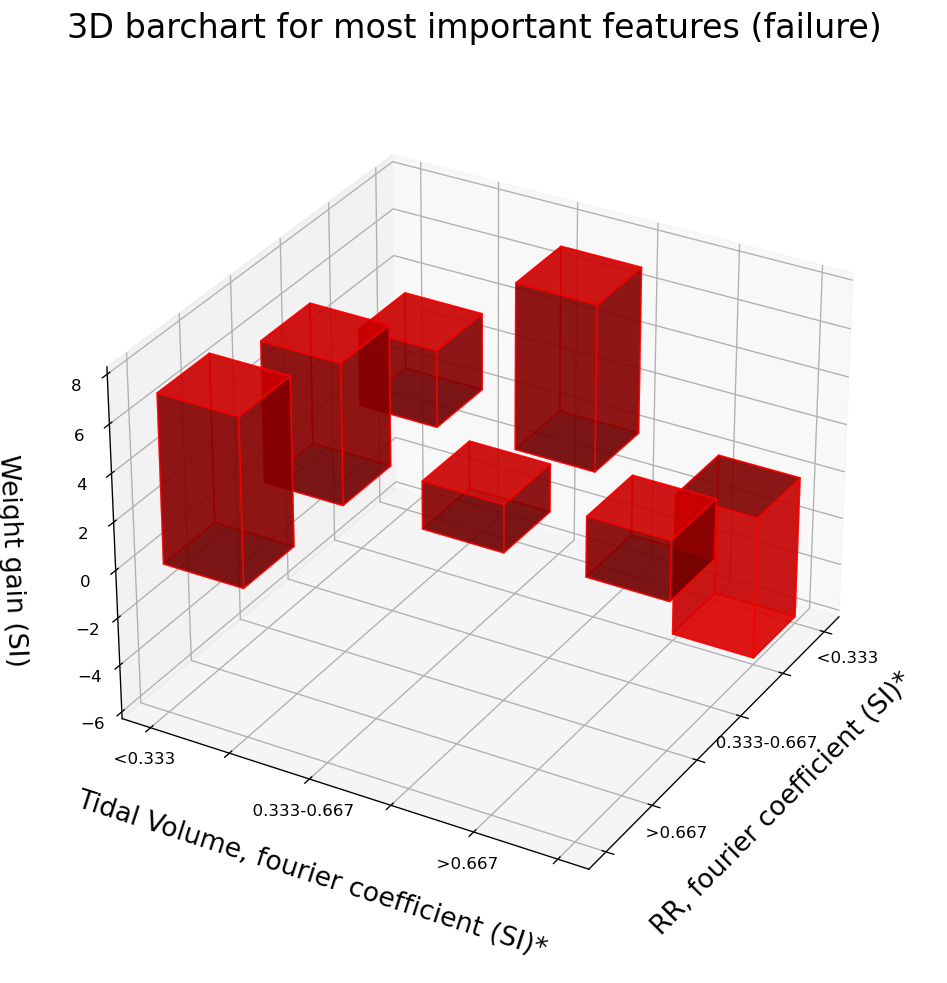

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
import matplotlib.cm as cm  
plt.rcParams["figure.figsize"] = [10,10]
plt.rcParams["figure.dpi"] = 120

df = pd.DataFrame({'Tidal_Volume__fft_coefficient__attr_abs__coeff_5': X_failure['Tidal_Volume__fft_coefficient__attr_abs__coeff_5'],
                   'RR__fft_coefficient__attr_abs__coeff_86': X_failure['RR__fft_coefficient__attr_abs__coeff_86'],
                   'Weight_gain': X_failure['Weight gain']})


df['Tidal_Volume__fft_coefficient__attr_abs__coeff_5']=(df['Tidal_Volume__fft_coefficient__attr_abs__coeff_5']-df['Tidal_Volume__fft_coefficient__attr_abs__coeff_5'].min())/(df['Tidal_Volume__fft_coefficient__attr_abs__coeff_5'].max()-df['Tidal_Volume__fft_coefficient__attr_abs__coeff_5'].min())
df['RR__fft_coefficient__attr_abs__coeff_86']=(df['RR__fft_coefficient__attr_abs__coeff_86']-df['RR__fft_coefficient__attr_abs__coeff_86'].min())/(df['RR__fft_coefficient__attr_abs__coeff_86'].max()-df['RR__fft_coefficient__attr_abs__coeff_86'].min())
df = df.fillna(df.mean())

x1 = pd.cut(df['RR__fft_coefficient__attr_abs__coeff_86'], 3)
y1 = pd.cut(df['Tidal_Volume__fft_coefficient__attr_abs__coeff_5'], 3)
z1 = df['Weight_gain']

out = (pd.DataFrame({'RR__fft_coefficient__attr_abs__coeff_86': x1.cat.codes,
                     'Tidal_Volume__fft_coefficient__attr_abs__coeff_5': y1.cat.codes,
                     'Weight_gain': z1})
         .groupby(['RR__fft_coefficient__attr_abs__coeff_86', 'Tidal_Volume__fft_coefficient__attr_abs__coeff_5'], as_index=False)['Weight_gain'].mean())

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
lgth = len(out)

ax.bar3d(out['RR__fft_coefficient__attr_abs__coeff_86'], out['Tidal_Volume__fft_coefficient__attr_abs__coeff_5'], np.zeros(lgth), np.ones(lgth)-0.5, 
        np.ones(lgth)-0.5, out['Weight_gain'],alpha=0.7,color = 'red', edgecolor='red')

a=ax.get_xticks().tolist()
a[1]='  <0.333'
a[2]=''
a[3]='   0.333-0.667'
a[4]=''
a[5]='  >0.667'
a[6]=''
ax.set_xticklabels(a)
plt.xticks(fontsize=10)
ax.set_xlabel('RR, fourier coefficient (SI)*', labelpad=18, rotation=120, fontsize=16)

b=ax.get_yticks().tolist()
b[1]='  <0.333'
b[2]=''
b[3]='  0.333-0.667'
b[4]=''
b[5]='  >0.667'
b[6]=''
ax.set_yticklabels(b)
plt.yticks(fontsize=10)
ax.set_ylabel('Tidal Volume, fourier coefficient (SI)*', labelpad=18, rotation=120,fontsize=16)

#ax.set_zlim(0,1)
ax.set_zlim3d([-6,8])
ax.set_zlabel('Weight gain (SI)', labelpad=18, rotation=120,fontsize=16)

ax.view_init(ax.elev, ax.azim+90)
ax.set_box_aspect(aspect=None, zoom=0.9)

plt.title("3D barchart for most important features (failure)", fontsize = 20)

plt.savefig('3D barchart for most important feature (failure).png', dpi = 900)
plt.show()


In [88]:
dict(zip(x1.cat.codes, x1))

{0: Interval(-0.001, 0.333, closed='right'),
 1: Interval(0.333, 0.667, closed='right'),
 2: Interval(0.667, 1.0, closed='right')}